# Abalone Dataset

## 1: Introduction
About this data The Abalone Dataset involves predicting the age of abalone given objective measures of individuals.
It is a multi-class classification problem, but can also be framed as a regression. The number of observations for each class is not balanced. There are 4,177 observations with 8 input variables and 1 output variable. The variable names are as follows:

1. Sex (M, F, I).
2. Length.
3. Diameter.
4. Height.
5. Whole weight.
6. Shucked weight.
7. Viscera weight.
8. Shell weight.
9. Rings

# 2: Data Pre processing


## 2.1 Loading the required Libraries

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#ML imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2.2 Get Data

In [3]:
## Loading the dataset from github repo
url = 'https://raw.githubusercontent.com/hargurjeet/MachineLearning/Abalone-Dataset/abalone.csv'
df = pd.read_csv(url)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

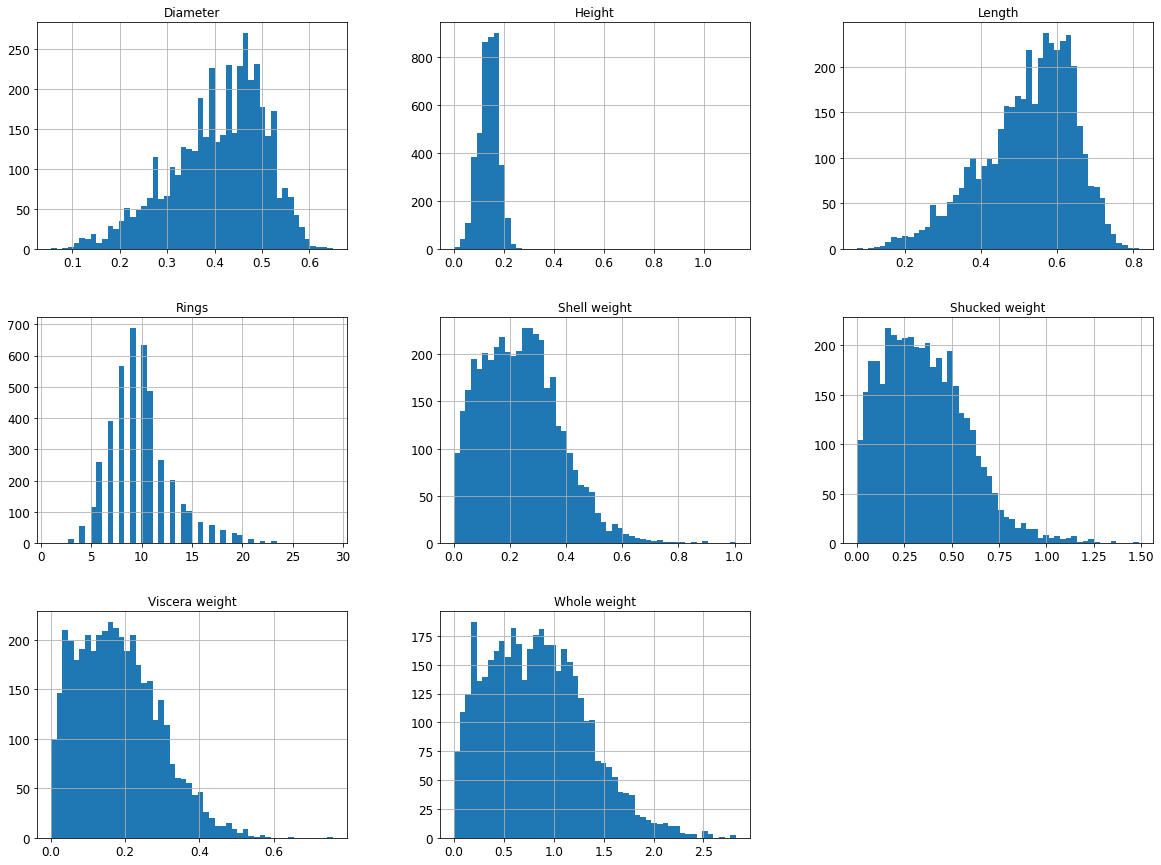

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## 2.3 Cleaning the dataset

In [9]:
df.duplicated().sum()

0

In [10]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


# 3: Preparing the data for ML


## 3.1 Applying Train,test and Split

In [11]:
## Splittng the dataset to train,test and split
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
validation_size = 0.2
seed = 7
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed,shuffle=True)

In [12]:
corr_matrix = df.corr()

corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

In [13]:
from sklearn.preprocessing import OneHotEncoder
df_cat = df[['Sex']]
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

df_cat_1hot.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

## 3.2 Building pipelines and feature scaling

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy="median")),
        # ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
X_num = X_train.drop("Sex", axis=1)
X_transformed = num_pipeline.fit_transform(X_num)

In [15]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ["Sex"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[ 0.20853113,  0.26347342, -0.35037005, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53864743, -0.79163838,  0.23398815, ...,  1.        ,
         0.        ,  0.        ],
       [-0.87072679, -0.99261206, -1.05159989, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.03300454, -1.89699361, -1.40221481, ...,  0.        ,
         1.        ,  0.        ],
       [-1.9499847 , -1.79650677, -1.51908645, ...,  0.        ,
         0.        ,  1.        ],
       [-1.61790534, -1.59553309, -1.05159989, ...,  0.        ,
         1.        ,  0.        ]])

# 4: Building ML models

## 4.1 Analysing the best model

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, X_test)

LinearRegression()

In [17]:
some_data = X_train.iloc[:5]
some_labels = X_test.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 8.86402173  8.69524625  7.59720292  9.25233051 11.70641729]
Labels: [9, 10, 6, 7, 14]


In [18]:
from sklearn.metrics import mean_squared_error

Rings_predictions = lin_reg.predict(X_prepared)
lin_mse = mean_squared_error(X_test, Rings_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.1755513112297824

In [19]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(X_test, Rings_predictions)
lin_mae

1.5623586521275268

## 4.2 Trying out most common ML models for regression

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(),
    LinearSVR(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

In [21]:
from sklearn.model_selection import cross_val_score

for clf in classifiers:
    clf.fit(X_prepared, X_test)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    scores = cross_val_score(clf, X_prepared, X_test, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print('****Results****')
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
****Results****
Scores:  [-5.18867513 -5.23048257 -3.86053006 -5.23271589 -6.24154548 -5.28863547
 -4.13079044 -5.06073613 -5.03397471 -3.90261572]
Mean:  -4.917070159668046
Std deviation:  0.7044048301814615
LinearSVR
****Results****
Scores:  [-5.51933828 -5.61035934 -4.00674029 -5.63975361 -5.89620085 -5.53345161
 -4.20822749 -4.86878407 -5.140331   -3.7945679 ]
Mean:  -5.021775443279
Std deviation:  0.7237393086065389
LinearRegression
****Results****
Scores:  [-5.08821908 -5.21507893 -3.91554926 -5.36357163 -6.04223401 -5.21627056
 -4.08223748 -4.84331976 -5.00773995 -3.79423678]
Mean:  -4.856845744304586
Std deviation:  0.6790518499209274
DecisionTreeRegressor
****Results****
Scores:  [ -9.88059701  -9.32634731  -7.08383234  -8.31137725  -8.94011976
  -8.96107784  -9.24550898  -8.02994012 -11.24550898  -8.79640719]
Mean:  -8.982071677540441
Std deviation:  1.054267104075962
RandomForestRegressor
****Results****
Scores:  [-4.85869522 -5.06504401 -3.6871994  -4.56972605 

## 4.3 Hyperparameter Tunning

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_prepared, X_test)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [24]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.535529166229905 {'max_features': 2, 'n_estimators': 3}
2.273750824941845 {'max_features': 2, 'n_estimators': 10}
2.186049523218441 {'max_features': 2, 'n_estimators': 30}
2.4766879304911513 {'max_features': 4, 'n_estimators': 3}
2.2133917402489143 {'max_features': 4, 'n_estimators': 10}
2.167606301992598 {'max_features': 4, 'n_estimators': 30}
2.43802832030863 {'max_features': 6, 'n_estimators': 3}
2.2161176944738 {'max_features': 6, 'n_estimators': 10}
2.1516175426916715 {'max_features': 6, 'n_estimators': 30}
2.469116144356013 {'max_features': 8, 'n_estimators': 3}
2.2479501884530135 {'max_features': 8, 'n_estimators': 10}
2.1807967721204493 {'max_features': 8, 'n_estimators': 30}
2.4407556135704733 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.247569064718448 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.469501247354686 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.2386697998815572 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## 4.4 Running the ML on best optimal parameters identified

In [25]:
final_model = grid_search.best_estimator_

Y_prepared = full_pipeline.transform(Y_train)
final_predictions = final_model.predict(Y_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print('RMSE:', final_rmse)

RMSE: 2.2546941404985064


In [26]:
some_date = Y_train.iloc[0 : 6]
some_labels = Y_test.iloc[0:6]

some_date_prepared = full_pipeline.transform(some_date)

print("Predictions:", final_model.predict(some_date_prepared))
print("Labels:", list(some_labels))

Predictions: [ 9.6         8.6         7.83333333  9.93333333 10.96666667  7.86666667]
Labels: [9, 10, 7, 9, 11, 8]
